In [2]:
!pip install neo4j
!pip install py2neo networkx

In [3]:
# Import necessary libraries
from neo4j import GraphDatabase

# Configuration parameters
uri = ""
username = ""
password = ""

# Create a database driver
driver = GraphDatabase.driver(uri, auth=(username, password))

# Session function
def run_query(query):
    with driver.session() as session:
        return list(session.run(query))

# Example Query: Fetch and print the first 10 nodes from the database
query = "MATCH (n) RETURN n LIMIT 10"
results = run_query(query)

for record in results:
    print(record)

# Close the driver connection
driver.close()


<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:127' labels=frozenset({'Node_201511060000'}) properties={'country': 'US', 'upstream': '1', 'city': 'Ashburn', 'downstream': '0', 'rank': '58258', 'id': '23148', 'state': 'VA', 'org_name': 'Verizon Business', 'as_name': 'TERRENAP'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:128' labels=frozenset({'Node_201511060000'}) properties={'country': 'FR', 'upstream': '2', 'downstream': '5', 'rank': '7639', 'id': '29608', 'org_name': 'Absolight SARL', 'as_name': 'WAN2MANY-AS'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:129' labels=frozenset({'Node_201511060000'}) properties={'id': '28625'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:130' labels=frozenset({'Node_201511060000'}) properties={'country': 'US', 'upstream': '11', 'city': 'Wilmington', 'downstream': '1', 'rank': '1286', 'id': '2906', 'state': 'DE', 'org_name': 'Netflix Streaming Services Inc.', '

# Visualization

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="", auth=("", ""))

# Fetch some data from Neo4j for visualization
query = """
MATCH (n)-[r]->(m)
RETURN n, r, m LIMIT 100
"""

data = graph.run(query)

# Create a directed graph using networkx
G = nx.DiGraph()

for record in data:
    # Add nodes
    G.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G.add_node(record["m"]["id"])

    # Add edge
    G.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


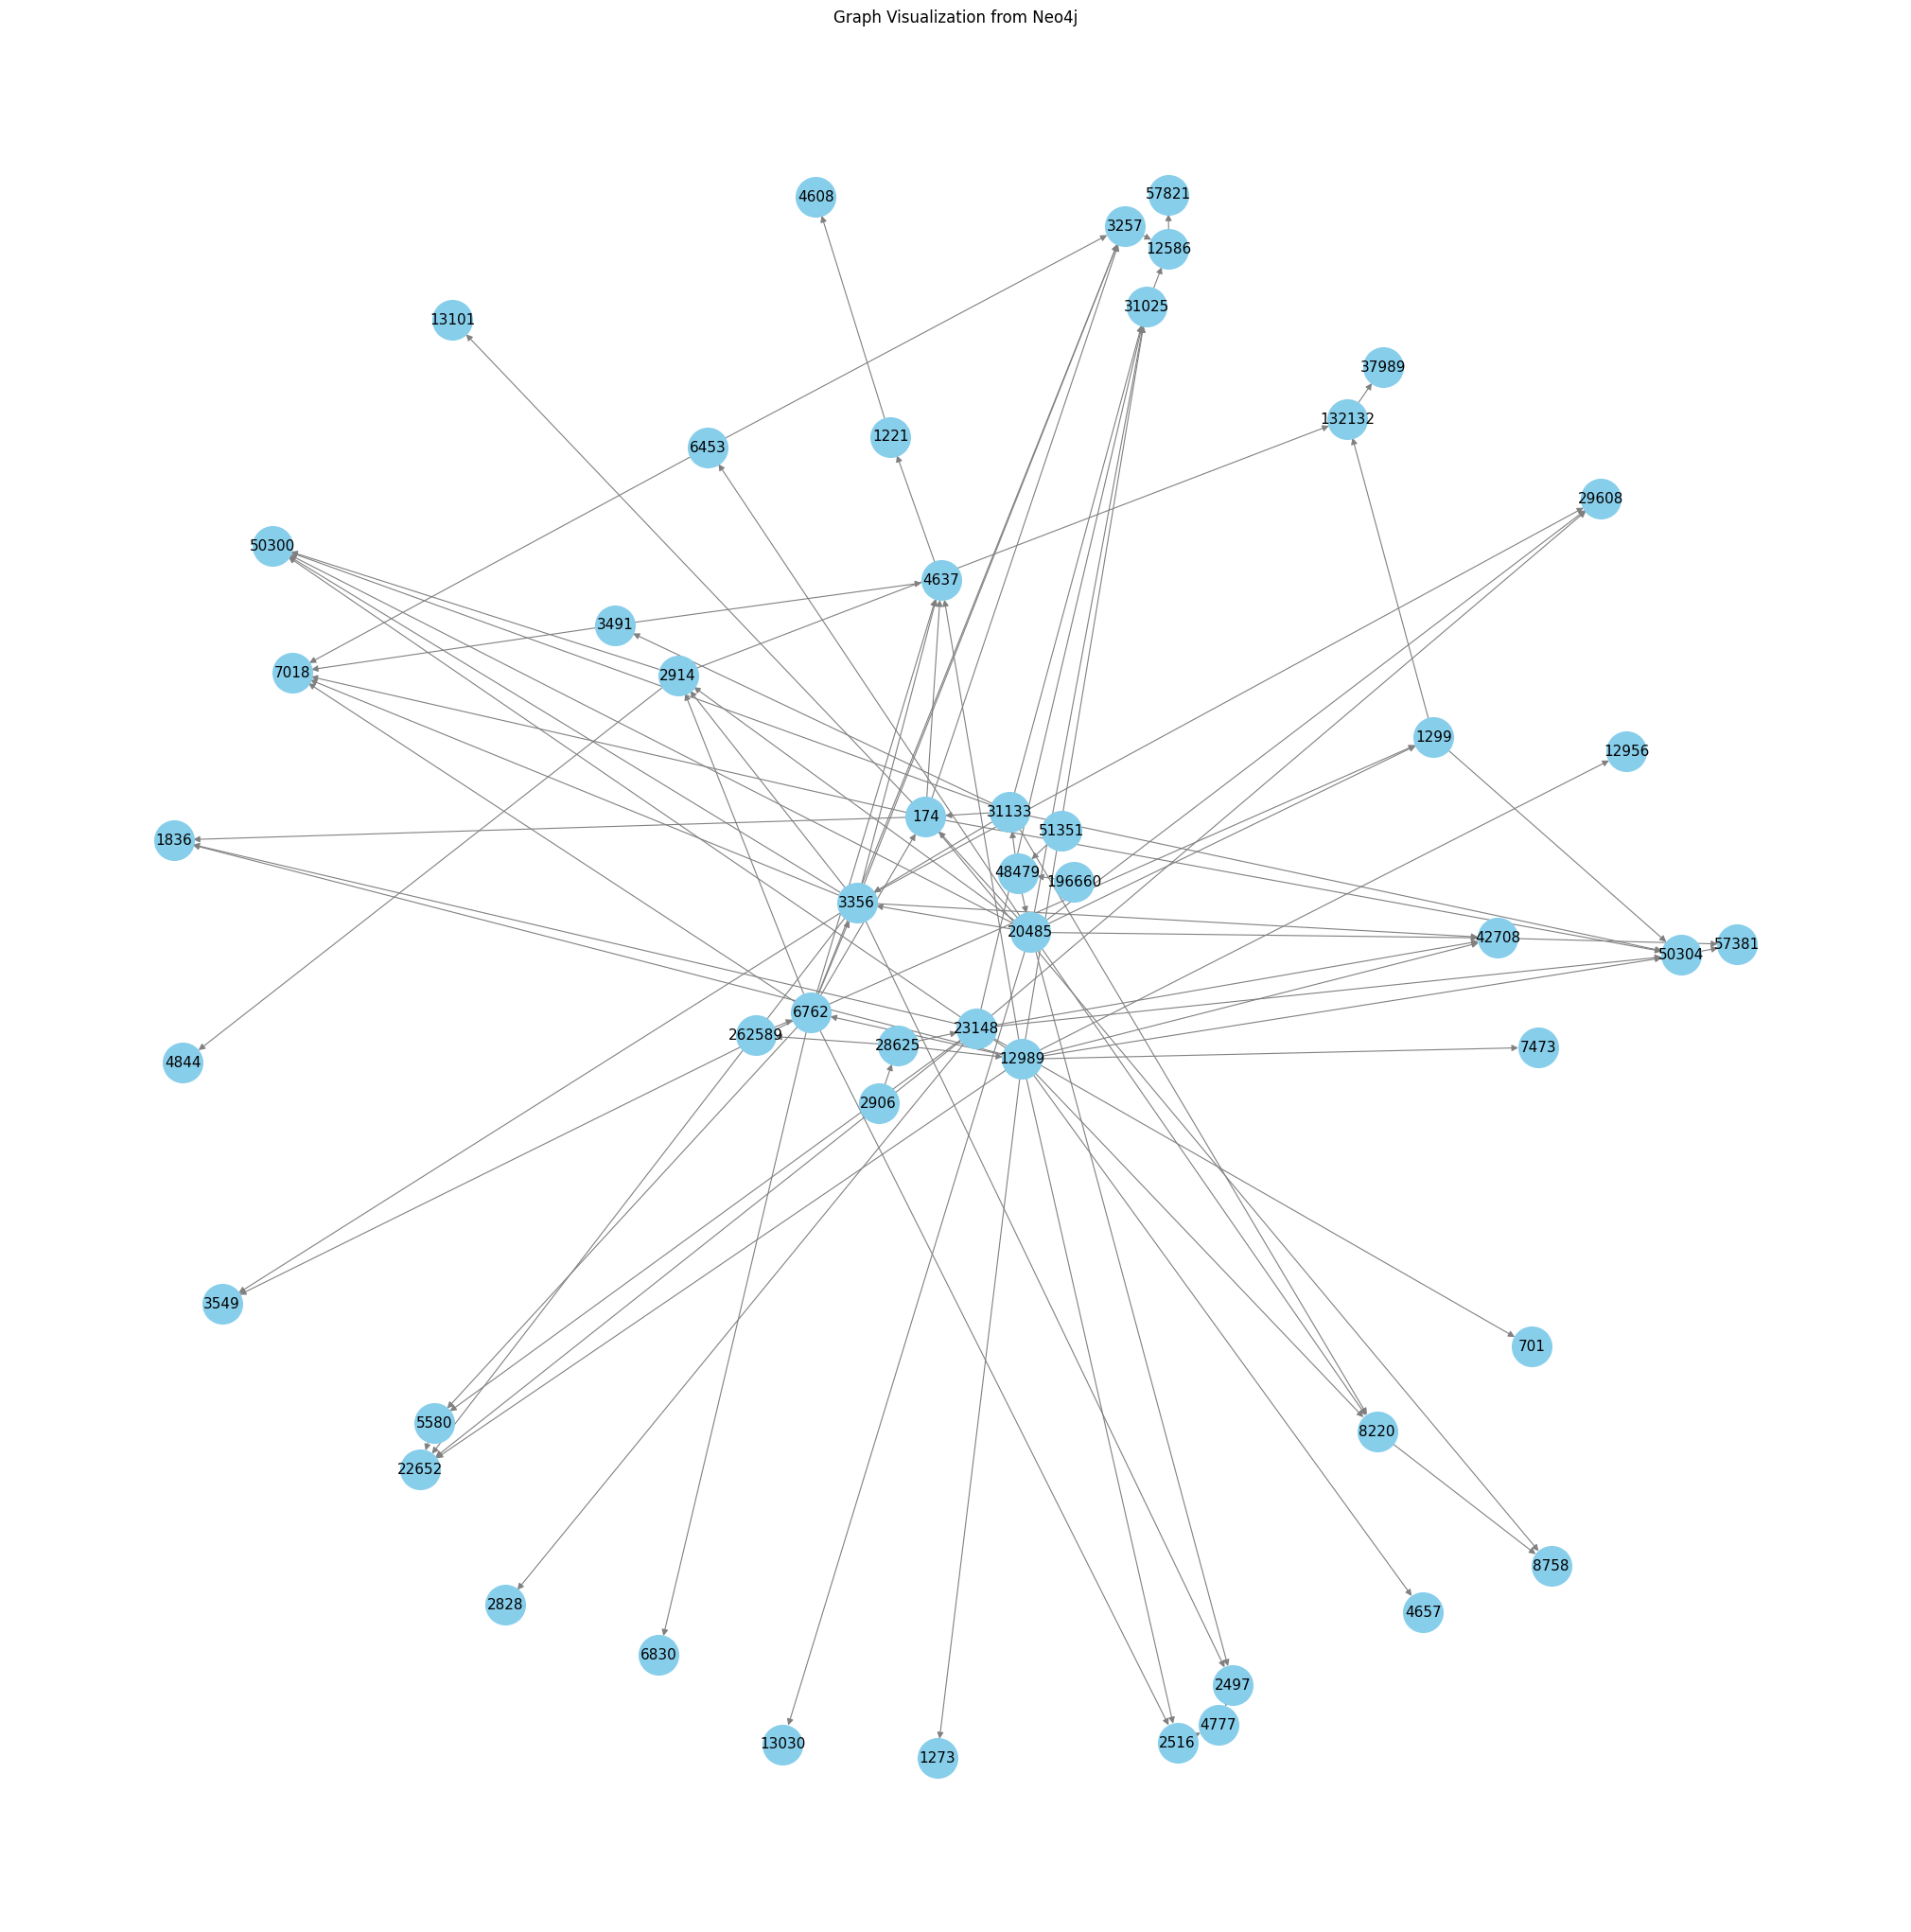

In [5]:
# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=900, node_color="skyblue", font_size=11, width=0.8, edge_color="gray")
plt.title("Graph Visualization from Neo4j")
plt.show()

# Retrieve Graph from Neo4j

In [6]:
# Connect to Neo4j
graph = Graph(uri="", auth=("", ""))

# Fetch some data from Neo4j for visualization
query_t1 = """
MATCH (n1:Node_201511060000)-[r1:CONNECTS_201511060000]->(m1:Node_201511060000)
RETURN n1, r1, m1;
"""

data_t1 = graph.run(query_t1)

# Create a directed graph using networkx
G_t1 = nx.DiGraph()

for record in data_t1:
    # Add nodes
    G_t1.add_node(record["n1"]["id"]) # Assuming nodes have a 'name' property
    G_t1.add_node(record["m1"]["id"])

    # Add edge
    G_t1.add_edge(record["n1"]["id"], record["m1"]["id"], type=type(record["r1"]).__name__)

In [7]:
# Fetch some data from Neo4j for visualization
query_t2 = """
MATCH (n2:Node_201511060800)-[r2:CONNECTS_201511060800]->(m2:Node_201511060800)
RETURN n2, r2, m2;
"""

data_t2 = graph.run(query_t2)

# Create a directed graph using networkx
G_t2 = nx.DiGraph()

for record in data_t2:
    # Add nodes
    G_t2.add_node(record["n2"]["id"]) # Assuming nodes have a 'name' property
    G_t2.add_node(record["m2"]["id"])

    # Add edge
    G_t2.add_edge(record["n2"]["id"], record["m2"]["id"], type=type(record["r2"]).__name__)

# Basic operations

In [8]:
# Retrieve all nodes
all_nodes = G_t1.nodes()

# Print all nodes
print("Num of nodes in the graph:")
print(len(all_nodes))

Num of nodes in the graph:
78


In [9]:
# Calculate the number of edges
num_edges = G_t1.size()

print(f"The graph has {num_edges} edges (or arcs).")

The graph has 139 edges (or arcs).


In [10]:
# Retrieve all nodes
all_nodes = G_t2.nodes()

# Print all nodes
print("Num of nodes in the graph:")
print(len(all_nodes))

Num of nodes in the graph:
78


In [11]:
# Calculate the number of edges
num_edges = G_t2.size()

print(f"The graph has {num_edges} edges (or arcs).")

The graph has 140 edges (or arcs).


# Degree centrality

### in-degree for all nodes

In [ ]:
# Calculate in-degrees for all nodes
in_degrees_t1 = sorted(G_t1.in_degree())

# Print in-degrees for all nodes
for node, degree in sorted(in_degrees_t1):
    print(f"Node {node} has {degree} incoming links.")

Node 11179 has 0 incoming links.
Node 11303 has 0 incoming links.
Node 12008 has 0 incoming links.
Node 1221 has 1 incoming links.
Node 1251 has 0 incoming links.
Node 12586 has 3 incoming links.
Node 1273 has 1 incoming links.
Node 12956 has 1 incoming links.
Node 12989 has 1 incoming links.
Node 1299 has 2 incoming links.
Node 13030 has 1 incoming links.
Node 13101 has 1 incoming links.
Node 132132 has 5 incoming links.
Node 134394 has 0 incoming links.
Node 16657 has 1 incoming links.
Node 16921 has 0 incoming links.
Node 174 has 4 incoming links.
Node 1836 has 4 incoming links.
Node 196660 has 0 incoming links.
Node 197888 has 0 incoming links.
Node 200802 has 0 incoming links.
Node 204016 has 0 incoming links.
Node 20485 has 1 incoming links.
Node 22652 has 4 incoming links.
Node 22804 has 0 incoming links.
Node 23148 has 1 incoming links.
Node 2497 has 2 incoming links.
Node 2516 has 2 incoming links.
Node 262397 has 0 incoming links.
Node 262415 has 0 incoming links.
Node 262589

In [ ]:
# Calculate in-degrees for all nodes
in_degrees_t2 = sorted(G_t2.in_degree())

# Print in-degrees for all nodes
for node, degree in sorted(in_degrees_t2):
    print(f"Node {node} has {degree} incoming links.")

Node 11179 has 0 incoming links.
Node 11303 has 0 incoming links.
Node 12008 has 0 incoming links.
Node 1221 has 1 incoming links.
Node 1251 has 0 incoming links.
Node 12586 has 3 incoming links.
Node 1273 has 1 incoming links.
Node 12956 has 1 incoming links.
Node 12989 has 1 incoming links.
Node 1299 has 2 incoming links.
Node 13030 has 1 incoming links.
Node 13101 has 1 incoming links.
Node 132132 has 5 incoming links.
Node 134394 has 0 incoming links.
Node 16921 has 0 incoming links.
Node 174 has 4 incoming links.
Node 1836 has 4 incoming links.
Node 196660 has 0 incoming links.
Node 197888 has 0 incoming links.
Node 200802 has 0 incoming links.
Node 204016 has 0 incoming links.
Node 20485 has 1 incoming links.
Node 22652 has 5 incoming links.
Node 22804 has 0 incoming links.
Node 23148 has 1 incoming links.
Node 2497 has 2 incoming links.
Node 2516 has 2 incoming links.
Node 262397 has 0 incoming links.
Node 262415 has 0 incoming links.
Node 262589 has 1 incoming links.
Node 26273

### out-degree for all nodes

In [ ]:
# Calculate out-degrees for all nodes
out_degrees_t1 = sorted(G_t1.out_degree())

# Print out-degrees for all nodes
for node, degree in out_degrees_t1:
    print(f"Node {node} has {degree} outgoing links.")

Node 10026 has 4 outgoing links.
Node 1103 has 1 outgoing links.
Node 1136 has 1 outgoing links.
Node 1221 has 2 outgoing links.
Node 12586 has 1 outgoing links.
Node 1273 has 1 outgoing links.
Node 1299 has 2 outgoing links.
Node 174 has 1 outgoing links.
Node 18144 has 1 outgoing links.
Node 1836 has 0 outgoing links.
Node 209 has 1 outgoing links.
Node 22652 has 0 outgoing links.
Node 23969 has 2 outgoing links.
Node 2497 has 1 outgoing links.
Node 2516 has 5 outgoing links.
Node 2519 has 2 outgoing links.
Node 2914 has 4 outgoing links.
Node 29608 has 0 outgoing links.
Node 31025 has 1 outgoing links.
Node 3257 has 4 outgoing links.
Node 3333 has 0 outgoing links.
Node 3356 has 7 outgoing links.
Node 3549 has 0 outgoing links.
Node 37989 has 0 outgoing links.
Node 38040 has 10 outgoing links.
Node 38803 has 2 outgoing links.
Node 42708 has 2 outgoing links.
Node 45896 has 0 outgoing links.
Node 4608 has 0 outgoing links.
Node 4637 has 2 outgoing links.
Node 4651 has 11 outgoing lin

In [ ]:
# Calculate out-degrees for all nodes
out_degrees_t2 = sorted(G_t2.out_degree())

# Print out-degrees for all nodes
for node, degree in out_degrees_t2:
    print(f"Node {node} has {degree} outgoing links.")

Node 11179 has 1 outgoing links.
Node 11303 has 1 outgoing links.
Node 12008 has 1 outgoing links.
Node 1221 has 1 outgoing links.
Node 1251 has 1 outgoing links.
Node 12586 has 1 outgoing links.
Node 1273 has 1 outgoing links.
Node 12956 has 1 outgoing links.
Node 12989 has 14 outgoing links.
Node 1299 has 2 outgoing links.
Node 13030 has 1 outgoing links.
Node 13101 has 1 outgoing links.
Node 132132 has 1 outgoing links.
Node 134394 has 1 outgoing links.
Node 16921 has 1 outgoing links.
Node 174 has 11 outgoing links.
Node 1836 has 0 outgoing links.
Node 196660 has 1 outgoing links.
Node 197888 has 1 outgoing links.
Node 200802 has 1 outgoing links.
Node 204016 has 1 outgoing links.
Node 20485 has 12 outgoing links.
Node 22652 has 0 outgoing links.
Node 22804 has 1 outgoing links.
Node 23148 has 9 outgoing links.
Node 2497 has 1 outgoing links.
Node 2516 has 1 outgoing links.
Node 262397 has 1 outgoing links.
Node 262415 has 1 outgoing links.
Node 262589 has 1 outgoing links.
Node 26

### Total number of links for all nodes

In [ ]:
# Calculate total degree (in-degree + out-degree) for all nodes
total_degrees = G.degree()

# Print total degree for all nodes
for node, degree in total_degrees:
    print(f"Node {node} has {degree} links.")

Node 3356 has 12 links.
Node 45896 has 4 links.
Node 3549 has 2 links.
Node 29608 has 3 links.
Node 22652 has 5 links.
Node 3257 has 8 links.
Node 7018 has 5 links.
Node 1836 has 4 links.
Node 6830 has 1 links.
Node 8758 has 3 links.
Node 6939 has 12 links.
Node 4844 has 3 links.
Node 57821 has 2 links.
Node 57381 has 3 links.
Node 50300 has 4 links.
Node 50304 has 5 links.
Node 4826 has 7 links.
Node 2497 has 3 links.
Node 4608 has 2 links.
Node 1299 has 4 links.
Node 38803 has 3 links.
Node 1221 has 4 links.
Node 56203 has 1 links.
Node 4777 has 3 links.
Node 37989 has 1 links.
Node 3333 has 4 links.
Node 12586 has 3 links.
Node 2516 has 9 links.
Node 209 has 2 links.
Node 1273 has 2 links.
Node 4637 has 6 links.
Node 10026 has 5 links.
Node 2519 has 3 links.
Node 7670 has 3 links.
Node 18144 has 1 links.
Node 38040 has 12 links.
Node 6762 has 6 links.
Node 2914 has 6 links.
Node 8220 has 2 links.
Node 1103 has 2 links.
Node 42708 has 3 links.
Node 9737 has 1 links.
Node 174 has 2 li

### Total number of links connected with a specific node (id=10026)

In [ ]:
result = total_degrees["10026"]

print(f"Number of nodes directly connected to node with id=10026: {result}")

Number of nodes directly connected to node with id=10026: 5


### Number of incoming links to a specific node (id=10026)

In [ ]:
result = in_degrees["10026"]

print(f"Number of incoming relationships to node with id=10026: {result}")

Number of incoming relationships to node with id=10026: 1


### Number of outgoing links to a specific node (id=10026)

In [ ]:
result = out_degrees["10026"]

print(f"Number of outgoing relationships from node with id=10026: {result}")

Number of outgoing relationships from node with id=10026: 4


# 2. Betweenness

In [ ]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get betweenness centrality for node 10026
node_centrality = betweenness_centrality["10026"]

print(f"Betweenness centrality for node 10026: {node_centrality}")

Betweenness centrality for node 10026: 0.01998299319727891


# isolated nodes

In [12]:
# Find isolated nodes
isolated_nodes = list(nx.isolates(G_t1))

# Check and print results
if isolated_nodes:
    print("Isolated nodes in the graph:")
    for node in isolated_nodes:
        print(node)
else:
    print("No isolated nodes found.")

No isolated nodes found.


In [13]:
# Find isolated nodes
isolated_nodes = list(nx.isolates(G_t2))

# Check and print results
if isolated_nodes:
    print("Isolated nodes in the graph:")
    for node in isolated_nodes:
        print(node)
else:
    print("No isolated nodes found.")

No isolated nodes found.


# complete graph

In [ ]:
def is_complete(G):
    n = len(G)
    if G.is_directed():
        return G.size() == n * (n - 1)
    else:
        return G.size() == n * (n - 1) // 2

# Check if G is a complete graph
if is_complete(G):
    print("G is a complete graph.")
else:
    print("G is not a complete graph.")

G is not a complete graph.


# clique

In [ ]:
# Convert G to its undirected version
G_undirected = G.to_undirected()

cliques = list(nx.find_cliques(G_undirected))

# Check if there are any cliques of size 2 or more
has_clique = any(len(clique) > 1 for clique in cliques)

if has_clique:
    print("G contains cliques. The cliques (of size 2 or more) are:")
    for clique in cliques:
        if len(clique) > 1:  # Only print cliques with more than one node
            print(clique)
else:
    print("G does not contain any clique (beyond single nodes).")

G contains cliques. The cliques (of size 2 or more) are:
['3356', '1299', '3257']
['3356', '4651', '29608']
['3356', '4651', '1836']
['3356', '4651', '2914']
['3356', '4651', '45896']
['3356', '3257', '2914', '7018']
['3356', '3257', '22652']
['3356', '7018', '6762']
['3356', '2516', '3549']
['8220', '8758']
['8220', '38040']
['4777', '2497']
['4777', '2516']
['4777', '2519']
['57821', '6939']
['57821', '12586']
['4844', '6939']
['4844', '37989']
['4844', '38040']
['6830', '8758']
['18144', '7670']
['7670', '2516']
['7670', '2519']
['50304', '6939', '57381']
['50304', '4651']
['50304', '42708', '38040']
['50304', '42708', '57381']
['1136', '3333']
['1136', '4651']
['38040', '1299']
['38040', '9737']
['38040', '2914']
['38040', '50300']
['38040', '2497']
['38040', '1103']
['38040', '6762']
['38040', '23969']
['4637', '4651']
['4637', '1221']
['4637', '2516']
['4637', '10026']
['4637', '6762']
['38803', '56203']
['38803', '1221']
['38803', '4826']
['6939', '29608']
['6939', '1836']
['693

In [ ]:
# Convert G to its undirected version
G_undirected = G.to_undirected()

cliques = list(nx.find_cliques(G_undirected))

for i in cliques:
  print(len(i))

3
3
3
3
3
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


# density

In [ ]:
# Compute the density of G
density = nx.density(G)

print(f"The density of G is: {density}")

The density of G is: 0.04081632653061224


# Reciprocity

In [ ]:
# Compute the reciprocity of G
reciprocity = nx.reciprocity(G)

print(f"The reciprocity of G is: {reciprocity}")

The reciprocity of G is: 0.02


# Global Clustering Coefficient

In [ ]:
# Assuming G is your graph object in networkx

# Compute the global clustering coefficient of G
global_clustering_coefficient = nx.transitivity(G)

print(f"The global clustering coefficient of G is: {global_clustering_coefficient}")

The global clustering coefficient of G is: 0.04185022026431718


# path length

In [ ]:
# Compute shortest path lengths for all pairs of nodes
all_pairs_lengths = dict(nx.all_pairs_shortest_path_length(G))

# For demonstration, print the shortest path lengths for some pairs (not all to avoid overwhelming output)
for node, lengths in list(all_pairs_lengths.items()):  # Change the number 10 to adjust the amount of output
    for target, length in lengths.items():
      if node == "4651" or target == "4651":
        print(f"Shortest path length between nodes {node} and {target} is: {length}")
      if node == "2519" or target == "2519":
        print(f"Shortest path length between nodes {node} and {target} is: {length}")

Shortest path length between nodes 2519 and 2519 is: 0
Shortest path length between nodes 2519 and 4777 is: 1
Shortest path length between nodes 2519 and 10026 is: 1
Shortest path length between nodes 2519 and 6939 is: 2
Shortest path length between nodes 2519 and 22652 is: 2
Shortest path length between nodes 2519 and 50300 is: 2
Shortest path length between nodes 2519 and 4637 is: 2
Shortest path length between nodes 2519 and 45896 is: 3
Shortest path length between nodes 2519 and 8758 is: 3
Shortest path length between nodes 2519 and 4844 is: 3
Shortest path length between nodes 2519 and 57821 is: 3
Shortest path length between nodes 2519 and 29608 is: 3
Shortest path length between nodes 2519 and 57381 is: 3
Shortest path length between nodes 2519 and 1836 is: 3
Shortest path length between nodes 2519 and 50304 is: 3
Shortest path length between nodes 2519 and 2516 is: 3
Shortest path length between nodes 2519 and 1221 is: 3
Shortest path length between nodes 2519 and 37989 is: 4
S

In [ ]:
# Connect to Neo4j
graph = Graph(uri="neo4j+s://28e5b287.databases.neo4j.io", auth=("neo4j", "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"))

# Query to find the shortest path length between Node 2519 and Node 4651
shortest_path_query = """
MATCH path = shortestPath((a {id: "2519"})-[*]-(b {id: "4651"}))
RETURN LENGTH(path) AS path_length
"""
path_length = graph.run(shortest_path_query).evaluate()

print(f"Shortest path length between Node 2519 and Node 4651: {path_length}")

Shortest path length between Node 2519 and Node 4651: 3


# local clustering coefficient.

In [ ]:
# Compute the local clustering coefficient for all nodes in G
local_clustering_coefficients = nx.clustering(G)

# Print the local clustering coefficients
for node, coefficient in local_clustering_coefficients.items():
    print(f"Node {node}: {coefficient}")

Node 3356: 0.08333333333333333
Node 45896: 0.16666666666666666
Node 3549: 0.5
Node 29608: 0.16666666666666666
Node 22652: 0.1
Node 3257: 0.10714285714285714
Node 7018: 0.2
Node 1836: 0.08333333333333333
Node 6830: 0
Node 8758: 0
Node 6939: 0.030303030303030304
Node 4844: 0
Node 57821: 0
Node 57381: 0.3333333333333333
Node 50300: 0.08333333333333333
Node 50304: 0.15
Node 4826: 0.047619047619047616
Node 2497: 0
Node 4608: 0
Node 1299: 0.16666666666666666
Node 38803: 0
Node 1221: 0
Node 56203: 0
Node 4777: 0
Node 37989: 0
Node 3333: 0
Node 12586: 0
Node 2516: 0.013888888888888888
Node 209: 0
Node 1273: 0
Node 4637: 0
Node 10026: 0.1
Node 2519: 0
Node 7670: 0
Node 18144: 0
Node 38040: 0.007575757575757576
Node 6762: 0.03333333333333333
Node 2914: 0.13333333333333333
Node 8220: 0
Node 1103: 0
Node 42708: 0.3333333333333333
Node 9737: 0
Node 174: 0
Node 6453: 0
Node 4713: 0
Node 4651: 0.030303030303030304
Node 4766: 0
Node 31025: 0
Node 1136: 0
Node 23969: 0


# Creating two graphs

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="", auth=("", ""))

# Fetch some data from Neo4j for visualization
query = """
match (n:Node_201511060000)-[r]->(m)
return n,r,m
"""

data = graph.run(query)

# Create a directed graph using networkx
G_1 = nx.DiGraph()

for record in data:
    # Add nodes
    G_1.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G_1.add_node(record["m"]["id"])

    # Add edge
    G_1.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="", auth=("", ""))

# Fetch some data from Neo4j for visualization
query = """
match (n:Node_201511060800)-[r]->(m)
return n,r,m
"""

data = graph.run(query)

# Create a directed graph using networkx
G_2 = nx.DiGraph()

for record in data:
    # Add nodes
    G_2.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G_2.add_node(record["m"]["id"])

    # Add edge
    G_2.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


In [ ]:
R = nx.intersection(G_1,G_2)

In [ ]:
check_list = []

for node in R.nodes():
  for node_2 in R.nodes():

    if(nx.has_path(G_1,node,node_2) & nx.has_path(G_2,node,node_2)):
      p1 = nx.shortest_path(G_1,node,node_2)
      p2 = nx.shortest_path(G_2,node,node_2)

      p1_l = nx.shortest_path_length(G_1,node,node_2)
      p2_l = nx.shortest_path_length(G_2,node,node_2)

      if((p1!=p2) & (p1_l!=p2_l)):
        check_list.append((node,node_2))

In [ ]:
check_list

[('31133', '4777'),
 ('31133', '2497'),
 ('22804', '4608'),
 ('22804', '57821'),
 ('22804', '37989'),
 ('22804', '4844'),
 ('22804', '7018'),
 ('22804', '13101'),
 ('22804', '4637'),
 ('22804', '2914'),
 ('22804', '3257'),
 ('22804', '132132'),
 ('22804', '1221'),
 ('22804', '12586'),
 ('22804', '50304'),
 ('22804', '174'),
 ('22804', '1836'),
 ('22804', '50300'),
 ('22804', '8758'),
 ('22804', '22652'),
 ('22804', '57381')]

In [ ]:
p1 = nx.shortest_path(G_1,'31133','4777')
p1

['31133', '3356', '2497', '4777']

In [ ]:
p1 = nx.shortest_path(G_2,'31133','4777')
p1

['31133', '174', '2914', '2497', '4777']

In [ ]:
print(nx.has_path(G_1,'4608','2497'))

True


1

# Change in no of paths

In [ ]:
all_paths = len(list(nx.all_simple_paths(G_1,'31133','4777')))
all_paths

1

In [ ]:
check_list = []

for node in R.nodes():
  for node_2 in R.nodes():

    if(nx.has_path(G_1,node,node_2) & nx.has_path(G_2,node,node_2)):

      p1_l = len(list(nx.all_simple_paths(G_1,node,node_2)))
      p2_l = len(list(nx.all_simple_paths(G_2,node,node_2)))

      if((p1_l!=p2_l)):
        check_list.append((node,node_2))

In [ ]:
check_list[:10]

[('28625', '4608'),
 ('28625', '4777'),
 ('28625', '57821'),
 ('28625', '37989'),
 ('28625', '2497'),
 ('28625', '4844'),
 ('28625', '3356'),
 ('28625', '7018'),
 ('28625', '4637'),
 ('28625', '2914')]

In [ ]:
print(len(list(nx.all_simple_paths(G_1,'28625','50300'))))
print(len(list(nx.all_simple_paths(G_2,'28625','50300'))))

9
7


In [ ]:
print(len(list(nx.all_simple_paths(G_1,'2906', '29608'))))
print(len(list(nx.all_simple_paths(G_2,'2906', '29608'))))

4
6


In [ ]:
print(len(list(nx.all_simple_paths(G_1,'1251', '4844'))))
print(len(list(nx.all_simple_paths(G_2,'1251', '4844'))))

6
5


# Diff in path and current path

In [ ]:
node_1 = '1251'
node_2 = '4844'

print(list(nx.all_simple_paths(G_1,node_1,node_2)))
print('Shortest Path',nx.shortest_path(G_1,node_1,node_2))

[['1251', '28625', '12989', '6762', '3356', '2914', '4844'], ['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844']]
Shortest Path ['1251', '28625', '12989', '7473', '4844']


In [ ]:
node_1 = '28625'
node_2 = '50300'

print(list(nx.all_simple_paths(G_1,node_1,node_2)))
print('Shortest Path',nx.shortest_path(G_1,node_1,node_2))

[['28625', '12989', '50300'], ['28625', '12989', '6762', '3356', '50300'], ['28625', '12989', '6762', '3356', '2914', '50300'], ['28625', '12989', '6762', '2914', '50300'], ['28625', '12989', '12956', '3356', '50300'], ['28625', '12989', '12956', '3356', '2914', '50300'], ['28625', '262589', '6762', '3356', '50300'], ['28625', '262589', '6762', '3356', '2914', '50300'], ['28625', '262589', '6762', '2914', '50300']]
Shortest Path ['28625', '12989', '50300']


# Path length

T1

In [17]:

# Define the start and end nodes
start_node = "22804"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [20]:

# Define the start and end nodes
start_node = "1251"
end_node = "4844"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

Path: ['1251', '28625', '12989', '6762', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '12989', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '12989', '7473', '4844'], Length: 4
Path: ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '262589', '6762', '2914', '4844'], Length: 5
[['1251', '28625', '12989', '6762', '3356', '2914', '4844'], ['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844']]


In [13]:

# Define the start and end nodes
start_node = "48479"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [14]:

# Define the start and end nodes
start_node = "22804"
end_node = "448479"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


T2

In [19]:

# Define the start and end nodes
start_node = "22804"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [21]:

# Define the start and end nodes
start_node = "48479"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [23]:

# Define the start and end nodes
start_node = "22804"
end_node = "448479"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [24]:

# Define the start and end nodes
start_node = "1251"
end_node = "4844"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

Path: ['1251', '28625', '12989', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '12989', '6762', '174', '2914', '4844'], Length: 6
Path: ['1251', '28625', '12989', '7473', '4844'], Length: 4
Path: ['1251', '28625', '262589', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '262589', '6762', '174', '2914', '4844'], Length: 6
[['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '6762', '174', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844'], ['1251', '28625', '262589', '6762', '174', '2914', '4844']]
